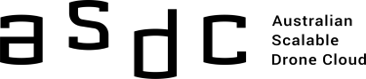

## <center>Structural Geology Use Case</center>

Workflow for fracture detection with Complex Shearlet Transform based on: 
https://github.com/rahulprabhakaran/Automatic-Fracture-Detection-Code

Using the Python port of the Matlab Toolbox Complex Shearlet-Based Ridge and Edge Measurement by Rafael Reisenhofer: https://github.com/rgcda/PyCoShREM

This sosftware is distributed under the GNU General Public Licence version 3 (GPLv3) with CSIRO Disclaimer.
Please see license file for full restrictions.

(c) CSIRO 2022 

Author: Ulrich Kelka

In [1]:
import os
import sys
#import asdc
sys.path.append('src')
import metadata as md
from processing import *
from tools import *

In [2]:
#Tools.FILE = ['DEM/DEMCOP30m_RameliusResources.tif']
#Tools.FILE = ['DEM/DEMCOP30m_AngloAmerican.tif']
#Tools.FILE = ['gaw/DEM_clip1.tif']
Tools.FILE = ['test/Ortho_3_061.png']

In [3]:
Tools.Prepare4Processing(Tools)

processing non-geotagged images...
with  3  channels
Channel:  1 : min:  0 max:  254
Channel:  2 : min:  0 max:  254
Channel:  3 : min:  0 max:  254
preparing image
gray : min:  2.0 max:  232.0


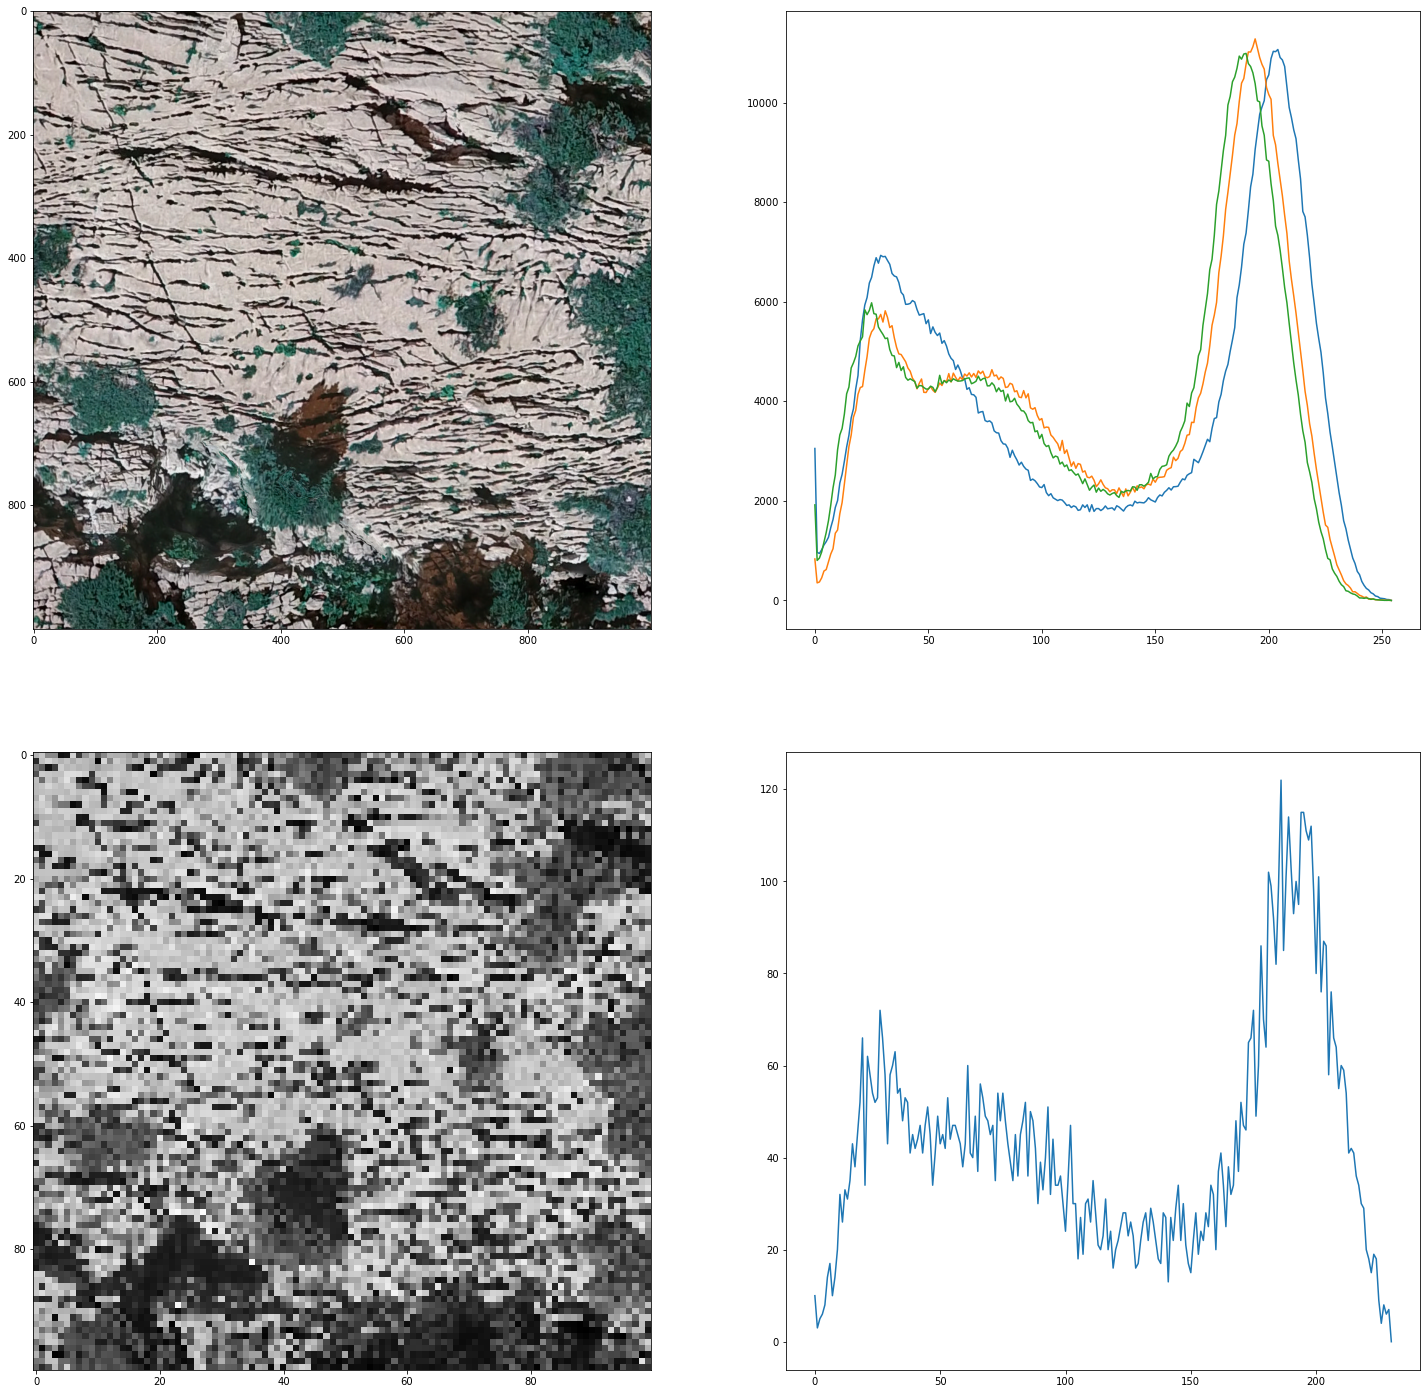

In [4]:
hist, proc_hist = PrepareImages(Tools)  
Tools.PlotPreparedImg(Tools, hist, proc_hist)

In [5]:
Tools.SelectEnhancement(Tools)

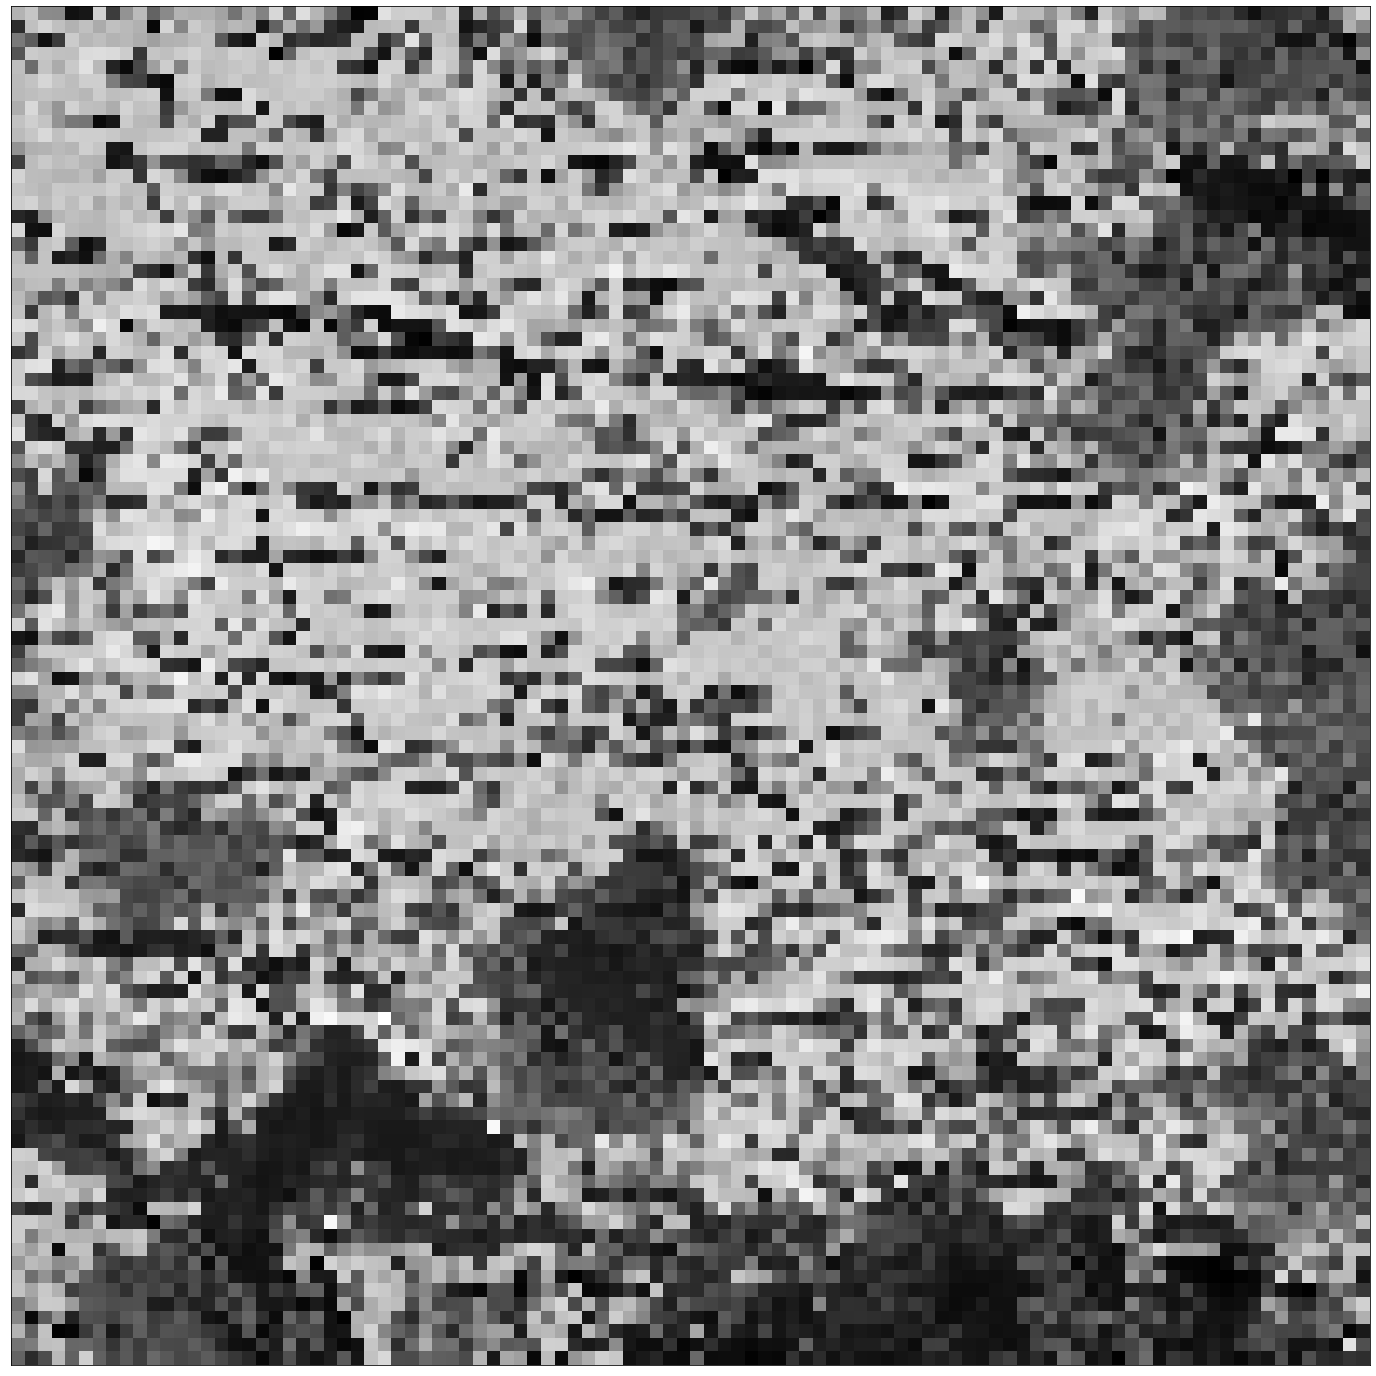

In [6]:
ReadImage(Tools)
Tools.ShowImage(Tools.DATA2)  

In [7]:
Tools.TileImage(Tools)

# Select System Parameters
Taken from 'The CoShREM Toolbox Parameter Guide' by Rafael Reisenhofer.\
http://www.math.uni-bremen.de/cda/software/CoShREM_Parameter_Guide.pdf

### waveletEffSupp

Length of the effective support in pixels of the Mexican hat wavelet ψ used in the construction the generating shearlet ψgen(x, y) = ψ(x)φ(y), where φ is a Gaussian. The effective support is the interval on which the values of ψ significantly differ from 0. It is, however, not a strictly defined property. A good choice for this parameter is often 1/8 of the image width. If the edges/ridges in the processed image are visible on a large scale, this value should be large relative to the width and height of the processed image.

### gaussianEffSupp
Length of the effective support in pixels of the Gaussian φ used in the construction of the generating shearlet ψgen(x, y) = ψ(x)φ(y), where ψ is a Mexican hat wavelet. Typically, this value is chosen to be roughly the half of waveletEffSupp. However, if the edges/ridges in the processed image consist of smooth curves, it can be chosen larger.

### scalesPerOctave
Determines the number of intermediate scales for each octave. If scalesPerOctave is set to n, for each orientation, there will be n differently scaled shearlets within one octave.

### shearLevel (orientations)
Determines the number of differently oriented shearlets on each scale. If shearLevel is set to n, there will be 2n + 2 differently sheared shearlets on each scale, completing a 180◦ semi-circle.

### alpha (orientations)
This parameter can take any value between 0 and 1 and governs the degree of anisotropy introduced via scaling. Roughly speaking, it determines how much the Gaussian is squeezed relative to the wavelet, when scaling the generating shearlet. Formally, the n-th octave is defined by ψn(x, y) = ψgen(2nx, 2αny). For alpha = 0, the degree of anisotropy is maximized while for alpha = 1, both directions are treated the same.

### octaves
The number of octaves spanned by the shearlet system. When scales- PerOctave is greater than 1, this parameter can also take non-integer values.

In [8]:
Tools.SystemCombinations(Tools)

In [9]:
GenerateSystems(Tools)                        

generating  1  systems. For  1  different sizes.
system size:  (100, 100)
CPUs:  16
 ridge systems
 done in  1.2574927806854248 s


# Detection Parameters

### minContrast
Specifies the minimal contrast for an edge/ridge to be detected.

### offset
This parameter defines a scaling offset between the even- and odd- symmetric shearlets measured in octaves. If offset = x, the first even-symmetric shearlet used for the computation of the complex shearlet-based edge measure is already x octaves above the first odd- symmetric shearlet considered. In the case of the ridge measure, the converse is true.

### scalesUsedForPivotSearch
This parameter defines which scales of the shearlet system are considered for determining the orientation for which the complex shearlet-based edge/ridge measure is computed at a specific location. It can take the values ’all’, ’highest’, ’lowest’ and any subset B ⊂ {1, . . . , scalesPerOctave·octaves}.

In [10]:
Tools.DetectionCombinations(Tools)

In [11]:
DetectFeatures(Tools)

detecting features with  1  systems.
1  detection combinations.
CPUs:  16
detecting ridges  1 / 1
 done in  1.4718124866485596 s


In [12]:
Tools.MosaicTiles(Tools)

converting back to original size


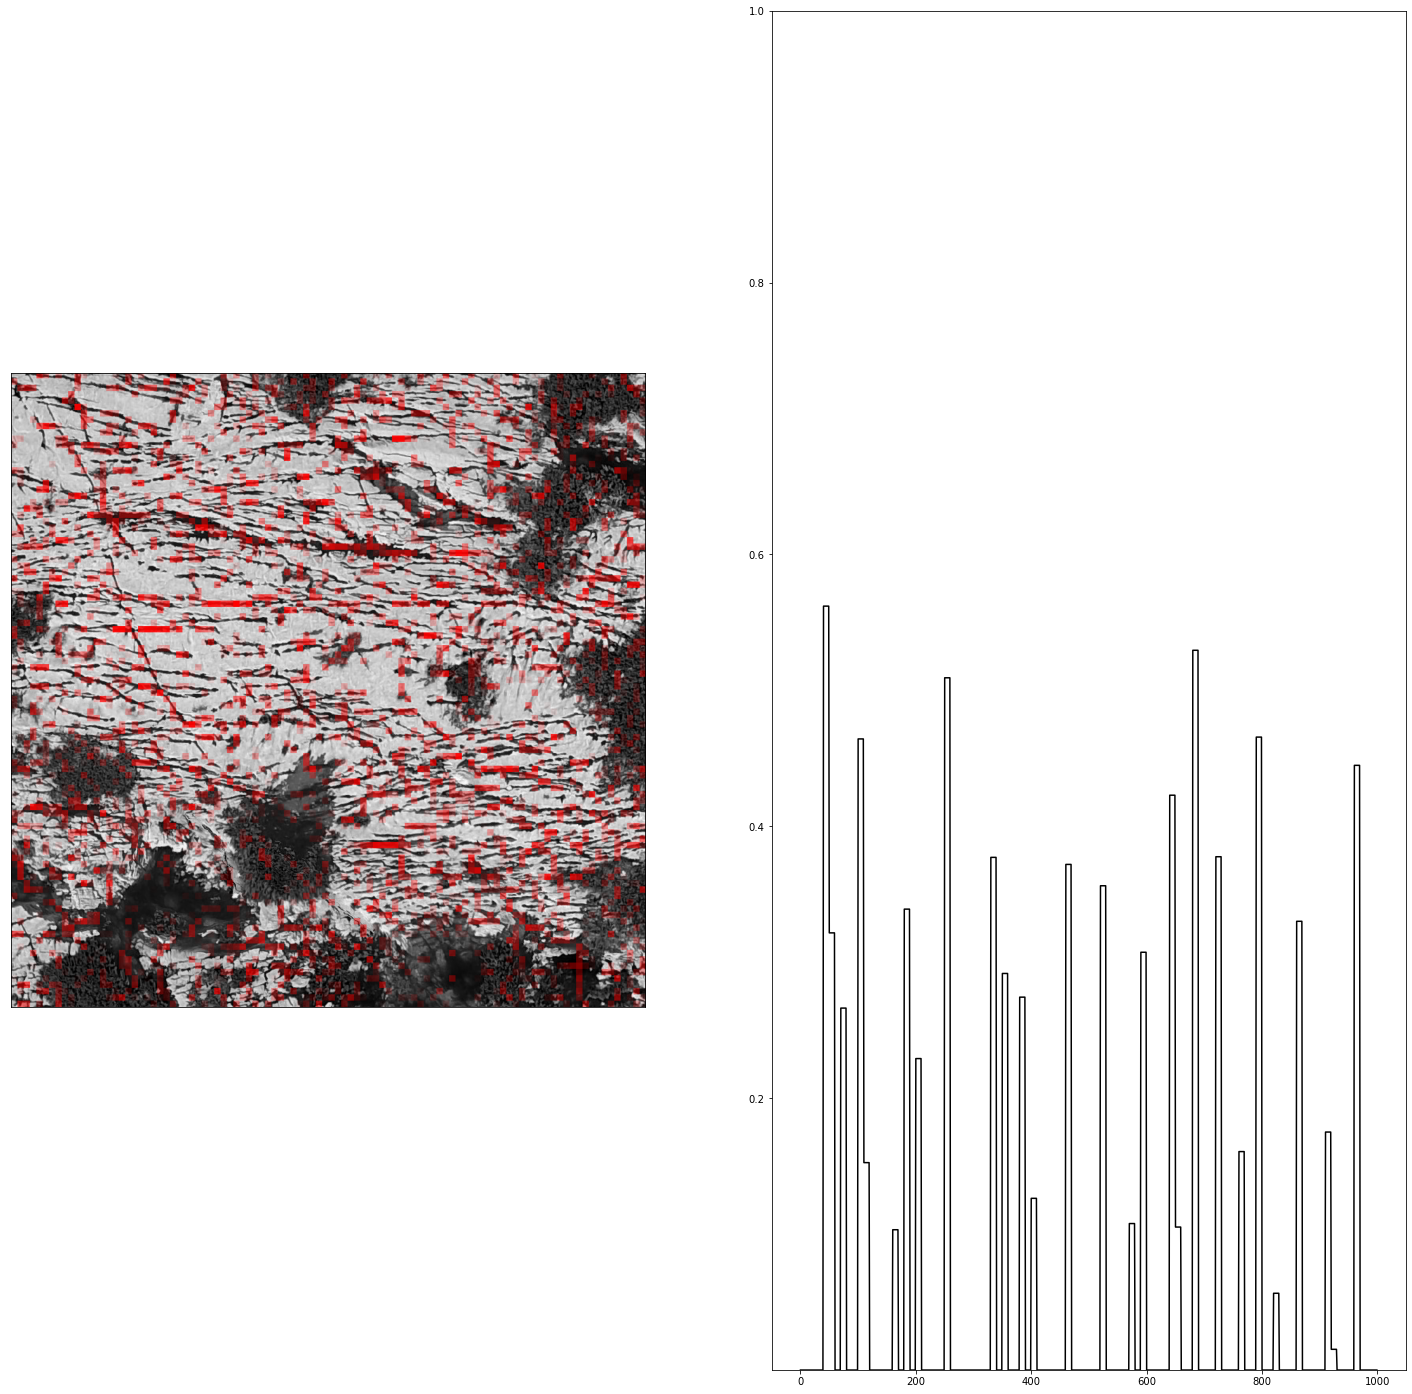

In [13]:
Tools.ShowOverlay(Tools)

In [14]:
Tools.SelectFilename(Tools, 'tif')

Text(value='test', description='Filename:', placeholder='filename')

In [15]:
Tools.WriteImage(Tools, Tools.FEATURES, Tools.GEOTIF)

Images will be written into  C:\Users\kel321\ASDC_notebooks\ASDC - CoSheRem
written image  testg


# Clean feature ensemble

### min pixel value
The minimum pixel value in the normalized feature ensemble. 

### kernel size
The size of the kernel used for morhological operations (closing, opening, erosion). 

### min cluster size
The minimum size of pixel clusters to keep in the image. 

In [16]:
Tools.Enhancement(Tools)

Imgae thresholding
 Threshhold:  0.0
 Kernel size:  3
removing patches smaller than  1
skeletonizing


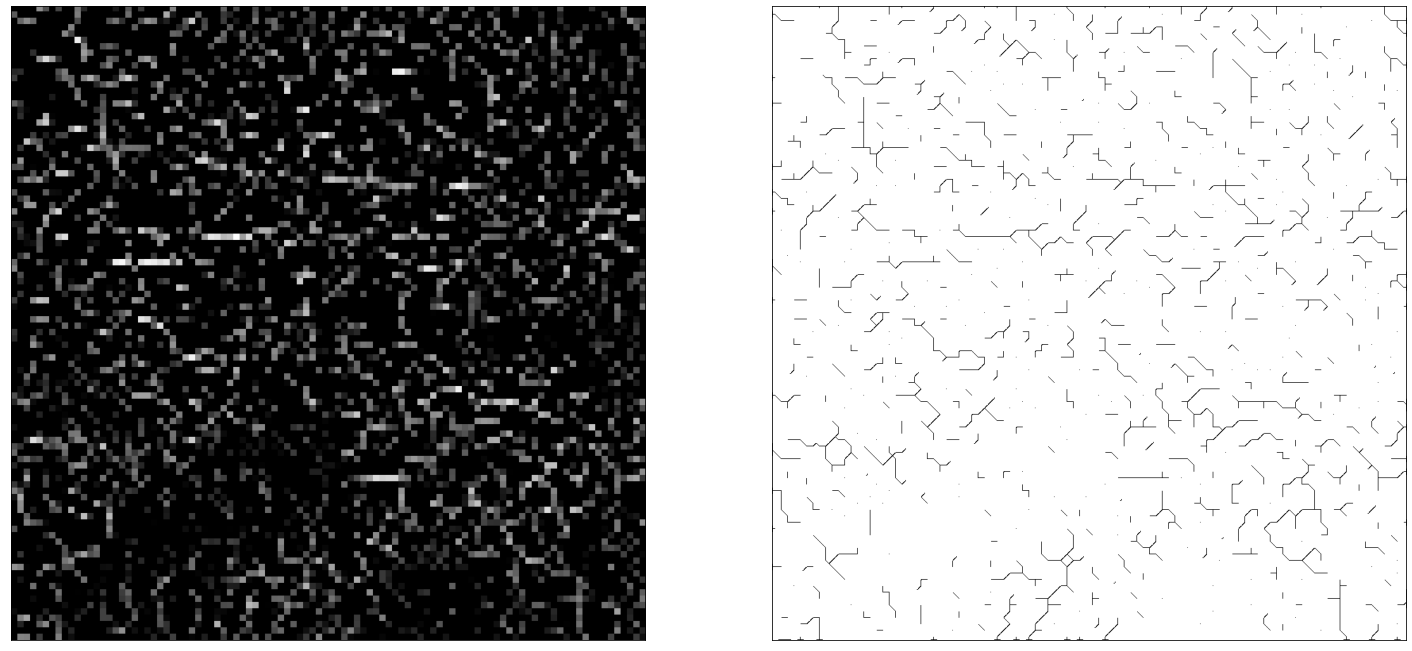

In [17]:
EnhanceEnsemble(Tools)
Tools.ShowCompare(Tools)

## Vectorize ensemble map
We use sknw.py to build a network from the skeleton.
The pyhton package used is: https://github.com/Image-Py/sknw

It is distributed under BSD 3-Clause License

Copyright (c) 2017, Yan xiaolong

In [18]:
Tools.SelectFilename(Tools, 'shp')

Text(value='test', description='Filename:', placeholder='filename')

In [19]:
Tools.SHP = BuildSHP(Tools.E_FEATURES, Tools.SHP, 100)

written  C:\Users\kel321\ASDC_notebooks\ASDC - CoSheRem\tests_0.shp


# Metadata
Publish processed images and associated metadata to CSIRO DAP(test).

In [20]:
Tools.GetCredential(Tools)

In [21]:
md.WriteCollection(Tools)

Collection 80194 metadata accessed
Uploading 3 assets...
1: input - test/Ortho_3_061.png
2: output - C:\Users\kel321\ASDC_notebooks\ASDC - CoSheRem\testg_0.tiff
3: output - C:\Users\kel321\ASDC_notebooks\ASDC - CoSheRem\tests_0.shp
Adding metadata to asset:/input/Ortho_3_061.png
Adding metadata to asset:/output/testg_0.tiff
Adding metadata to asset:/output/tests_0.shp
